# Predict the critical temperature based on the features extracted using Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [2]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('train.csv')


In [4]:
dataset.head()
#

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [5]:
dataset.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [6]:
dataset.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

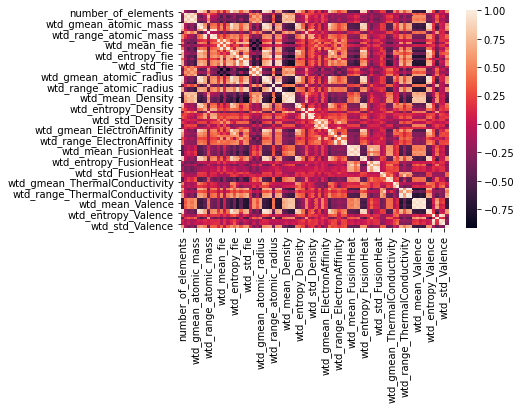

In [7]:
sns.heatmap(dataset.corr())

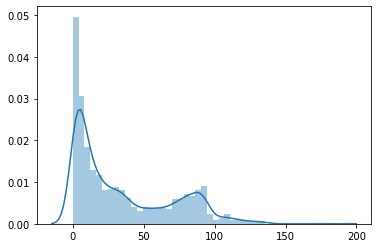

In [8]:
 sns.distplot(dataset.critical_temp.values)

### Splitting the dataset into the Training set and Test set

In [9]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [10]:
#K-fold Cross Validation model evaluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
sc= MinMaxScaler()
# fix random seed for reproducibility
seed = 7
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, y):
    X[train]= sc.fit_transform(X[train])
    X[test]= sc.transform(X[test])

## Part 2 - Building the ANN

### Initializing the ANN

In [11]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [12]:
ann.add(tf.keras.layers.Dense(units=512, activation='relu'))


In [13]:
ann.add(tf.keras.layers.Dropout(0.5))

### Adding the second hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [15]:
ann.add(tf.keras.layers.Dropout(0.5))

### Adding third hidden layer

In [16]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.5))

### Adding the output layer

In [17]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [18]:
ann.compile(optimizer= 'adam', loss= 'mean_squared_error')

### Training the ANN model on the Training set

In [ ]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 , patience=100)
#mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
# fit model
history = ann.fit(X[train], y[train], validation_data = (X[test],y[test]), epochs=400, batch_size = 64, verbose=1)

Epoch 1/400
300/300 [==============================] - 1s 4ms/step - loss: 598.7131 - val_loss: 445.1093
Epoch 2/400
300/300 [==============================] - 1s 3ms/step - loss: 407.6660 - val_loss: 342.0211
Epoch 3/400
300/300 [==============================] - 1s 5ms/step - loss: 374.0397 - val_loss: 313.0332
Epoch 4/400
300/300 [==============================] - 1s 4ms/step - loss: 350.7211 - val_loss: 289.2483
Epoch 5/400
300/300 [==============================] - 1s 4ms/step - loss: 347.1988 - val_loss: 300.7467
Epoch 6/400
300/300 [==============================] - 1s 4ms/step - loss: 350.3181 - val_loss: 274.2176
Epoch 7/400
300/300 [==============================] - 1s 4ms/step - loss: 330.1915 - val_loss: 266.2049
Epoch 8/400
300/300 [==============================] - 1s 4ms/step - loss: 330.2460 - val_loss: 261.6071
Epoch 9/400
300/300 [==============================] - 1s 4ms/step - loss: 328.3861 - val_loss: 258.6940
Epoch 10/400
300/300 [==============================] -

In [ ]:
# Generate generalization metrics
scores = ann.evaluate(X[test], y[test], verbose=1)
print('%s: %.2f%% (MSE)' % (ann.metrics_names[1], scores[0]))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

### Predicting the results of the Test set

In [ ]:
y_pred = ann.predict(X[test])
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y[test].reshape(len(y[test]),1)),1))

In [ ]:
ax1 = sns.distplot(y[test], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)

In [ ]:
plt.scatter(y[test], y_pred, color='blue')
plt.xlabel('Observed Critical Temperature (K)')
plt.ylabel('Predicted Critical Temperature (K)')

In [ ]:
loss_function = pd.DataFrame(history.history)
loss_function.plot()

In [ ]:
np.sqrt(loss_function['loss'])

In [ ]:
np.sqrt(loss_function['val_loss'])